# INTRODUCTION

Music has and always be a big part of people's lives. Since the dawn of time, music has been rich in culture, creativity, meaning, and technique. Nowadays, we can determine the kinds of people based on the music they listen to. Though, what has emerged in the more recent centuries is the term popular music, thanks to the digital distribution of music all around the globe. Many genres, styles, and even culture has been exchanged in the past few decades of music, where even video games have their own soundtracks/albums.

From our common interest in music, we have decided to look into analysing the data that music app APIs can provided, hopefully coming to some significant results from the statistical analyses performed. In additon, we will also judge if the specified API is sufficient for data analysing use, based on the results from performed statistical analyses on the API data.

#### MAIN RESEARCH QUESTION: Is the chosen music app API sufficient for statistical analysis use?

# DATA

Initially, we wanted to take data from Spotify's Web API, seeing as Spotify is one of the biggest audio streaming apps in the world, with millions of users worldwide and hosting a wide library of music, old and new. Plus, we could access more specific details about songs, like in which regions was it unplayable in. However, from recent changes made to the API, it proved difficult to utilise it, outside of spending money for a paid version. So, we decided to go for YouTube Music, which while it may not be as widely used as Spotify, it still was big enough to host plenty of music to choose from, specifically video game OSTs. We also decided that including video game music may lead to some intersting results.

## DATASET

In [ ]:
#Install the unofficial YouTube Music API
!pip install ytmusicapi

Note that the API is unoffical and NOT from Google. It essentially acts as if we were searching on YouTube directly, taking information where it can. Thus, some song information unfortunately cannot be accessed due to not being on YouTube (ex: restricted regions, music genres), without having to go through multiple hoops. We do not know everything from the API, so please do try it out yourself if you are intersted!

YTMusicAPI will be tested to see if it is fit for data analysis.

In [ ]:
#Import statements
import pandas as pd
import numpy as np
from ytmusicapi import YTMusic

### CREATING THE DATASET

In [ ]:
#Initialise the client for searching for songs
client = YTMusic()

Due to the nature of the search of the API, a list of artists has been made to search for songs. While we attempted to gather a wide range of music, in genre and age, most artists have been picked from our own personal playlists. We made sure to pick a few notable video game music producers/artists.

In [ ]:
#Artist list (non-VGM)
artist_list = ["Earth Wind and Fire", 'Bee Gees', 'Carpenters', 'Queen', 'Cyndi Lauper',
               'ABBA', 'Elton John', 'Marvin Gaye', 'James Taylor', 'Juice Newton', 'Michael Jackson',
               'Christopher Cross', 'Sade', 'Pink Floyd', 'Patti Austin', 'NSYNC', 'One Direction',
               'Backstreet Boys', 'Beyonce', 'Mariah Carey', 'Bruno Mars', "kessoku band", "Stevie Wonder",
               "Hoshimachi Suisei", "Eminem", "Smash Mouth", "Rick Astley", "Taylor Swift", "Frank Sinatra",
               "Sex Pistols", "Coldplay", "Kendrick Lamar", "Rihanna", "Linkin Park", "Adele", "DECO*27",
               "Hatsune Miku", 'Eve', 'Jungle', 'Sabrina Carpenter', "Ado", "Renee Olstead", "Billy Joel",
               'Evanescence', 'Norah Jones', 'Laufey']

In [ ]:
#Artist list (VGM)
vgm_list = ["SEGA", "ATLUS Sound Team", "SQUARE ENIX MUSIC", "Capcom Sound Team"]

However, there are some artists that have made VGM, but also make their own music too. We will be segregating these artists into their own list, for ease of future analyses; it will be easier to compare VGM to non-VGM.

In [ ]:
#Artist list (VGM and non-VGM)
vgm_andm_list = ['Crush 40', 'Hideki Naganuma']

With the artist lists determined, we can now begin searching for songs and gathering their information to be concatenated into a dataset!

In [ ]:
#Initialise lists for song details
titles = []
albums = []
years = []
artists = []
durations = []
isExplicits = []
view_counts = []

- Title: name of the song
- Album: name of album that song is in, can be None
- Year of Release (years): year of release of song, can be None
- Artist: artist of song
- Song Duration: how long a song plays for, in seconds
- Explicit: if the song has explicit content or not
- View Count: how many views/listens a song has, main metric for gauging popularity of songs

Below is the main function that gathers songs from an artist search, then gathering song information to be stored in the initialised lists.

In [ ]:
#Function to gather songs, with details store in their respective lists, based on given artist.
def get_songs(artist):

    #Given artist, search for up to 50 songs
    result = client.search(query = artist, filter = 'songs', scope = None, limit = 20) #limit cannot go lower than 20, for some reason

    #For each song found, add their details to each corresponding list
    for i in result:
        titles.append(i['title'])
        #Check to see if song is part of an album or not
        check = i['album']
        if not check['name']:
            albums.append(None)
        else:
            albums.append(i['album']['name'])
        years.append(get_date(i))
        #Takes the first artist from the list of artists, assuming that the first is the original artist
        artists.append(i['artists'][0]['name'])
        #Song duration is in seconds
        durations.append(i['duration_seconds'])
        isExplicits.append(i['isExplicit'])
        view_counts.append(views_toFloat(i['views']))
    return True

Below is the function for obtaining the release year of a given song, taken from its album. If the song is not in an album, then the year will default to None.

In [ ]:
#Function that obtains release year of song from its album, if it exists.
def get_date(song_obj):
    if not song_obj['album']['id']:
        return None
    album_id = song_obj['album']['id']
    if not client.get_album(album_id):
        return None
    result = client.get_album(album_id)
    year = result['year']
    return year

When accessing the view counts of each song, the result was a string. This is due to the large view counts on YouTube, so a function has been made to turn the string counts into decimals.

In [ ]:
#Function that turns the string view counts into floats.
def views_toFloat(view_count):
    if view_count[-1] == 'B':
        return float(view_count[:-1]) * 1000000000
    elif view_count[-1] == 'M':
        return float(view_count[:-1]) * 1000000
    elif view_count[-1] == 'K': #in case thousands of views are represented like this
        return float(view_count[:-1]) * 1000
    else:
        return float(view_count)

With all functions established, the dataset can now be constructed.

In [ ]:
#Concatinate all artist lists
full_artist_list = artist_list + vgm_andm_list + vgm_list
print("Number of artists considered in the dataset:", len(full_artist_list))

Number of artists considered in the dataset: 52


In [ ]:
#Iterate through each artist in the full list, making a song search for each one
for artist in full_artist_list:
    print('Currently searching:', artist)
    get_songs(artist)
print("Search complete!")

Currently searching: Earth Wind and Fire
Currently searching: Bee Gees
Currently searching: Carpenters
Currently searching: Queen
Currently searching: Cyndi Lauper
Currently searching: ABBA
Currently searching: Elton John
Currently searching: Marvin Gaye
Currently searching: James Taylor
Currently searching: Juice Newton
Currently searching: Michael Jackson
Currently searching: Christopher Cross
Currently searching: Sade
Currently searching: Pink Floyd
Currently searching: Patti Austin
Currently searching: NSYNC
Currently searching: One Direction
Currently searching: Backstreet Boys
Currently searching: Beyonce
Currently searching: Mariah Carey
Currently searching: Bruno Mars
Currently searching: kessoku band
Currently searching: Stevie Wonder
Currently searching: Hoshimachi Suisei
Currently searching: Eminem
Currently searching: Smash Mouth
Currently searching: Rick Astley
Currently searching: Taylor Swift
Currently searching: Frank Sinatra
Currently searching: Sex Pistols
Currently s

The code above may take some time due to the large amount of searches!

In [ ]:
#Initialise an empty DataFrame, to be filled
df_songs = pd.DataFrame()

#Loading each column with its respective lists
df_songs['Title'] = titles
df_songs['Album'] = albums
df_songs['Year of Release'] = years
df_songs['Artist'] = artists
df_songs['Song Length'] = durations
df_songs['Explicit'] = isExplicits
df_songs['View Count'] = view_counts
#df_songs['Lyrics'] = lyrics_eachsong

df_songs

,Title,Album,Year of Release,Artist,Song Length,Explicit,View Count
0,Let's Groove,Raise!,1981,"Earth, Wind & Fire",340,False,6.230000e+08
1,September,"The Best Of Earth, Wind & Fire Vol. 1",1978,"Earth, Wind & Fire",216,False,1.200000e+09
2,September,Feel Good Friday,2018,"Earth, Wind & Fire",218,False,1.200000e+09
3,Boogie Wonderland,Skatetown USA (Music from the Motion Picture S...,1979,"Earth, Wind & Fire",290,False,5.270000e+08
4,Fantasy,All 'N All,1977,"Earth, Wind & Fire",278,False,8.500000e+07
...,...,...,...,...,...,...,...
1035,"Save Theme (from ""Resident Evil 4"")",Video Game Piano Covers II,2023,Sebastien Skaf,153,False,2.710000e+02
1036,"Endless Maze / Jungle - Espinas (From ""Monster...","Intense Symphonic Metal Covers, Vol. 29",2023,FalKKonE,223,False,1.770000e+05
1037,Guile's Theme (Super Street Fighter II),Guile's Theme (Super Street Fighter II),2023,The Remix Station,127,False,2.380000e+02
1038,"Solar Inferno (Solar Man Stage) (From ""Mega Ma...","Solar Inferno (Solar Man Stage) (From ""Mega Ma...",2022,GaMetal,223,False,2.030000e+05


The resulting dataset has 1040 observations (52 artists x 20 songs each). Note that the view counts are shown in exponential form, due to being quite large in values.

## DATA CLEANING

Although the dataset is mostly complete in information, there is data cleaning to be made.

In [ ]:
df_songs.head(3)

,Title,Album,Year of Release,Artist,Song Length,Explicit,View Count
0,Let's Groove,Raise!,1981,"Earth, Wind & Fire",340,False,6.230000e+08
1,September,"The Best Of Earth, Wind & Fire Vol. 1",1978,"Earth, Wind & Fire",216,False,1.200000e+09
2,September,Feel Good Friday,2018,"Earth, Wind & Fire",218,False,1.200000e+09


Notice that there can be duplicates of songs found within the dataset, which can complicate further analyses with multiple years of release and song lengths for the same song. So, duplicate songs will be removed, where the first apperance of the song will be retained; the rationale is that the first result is most likely the original song.

In [ ]:
#Removing duplicate songs
df_songs = df_songs.sort_values(by = ['Title', 'Year of Release'])
df_songs = df_songs.drop_duplicates(subset = 'Title', keep = 'first')
df_songs = df_songs.reset_index(drop = True)

df_songs

,Title,Album,Year of Release,Artist,Song Length,Explicit,View Count
0,(And) Then He Kissed Me,Ain't Gonna Cry,1989,Juice Newton,200,False,202000.0
1,(God Must Have Spent) A Little More Time On You,'N Sync,1997,*NSYNC,283,False,54000000.0
2,(Our Love) Don't Throw It All Away,Shadow Dancing,1978,Andy Gibb,251,False,9000000.0
3,15 Minutes,Short n' Sweet (Deluxe),2025,Sabrina Carpenter,192,True,8400000.0
4,18,FOUR (Deluxe),2014,One Direction,249,False,226000000.0
...,...,...,...,...,...,...,...
951,青春コンプレックス - seisyun complex,seisyun complex,2022,kessoku band,206,False,47000000.0
952,風のゆくえ - Where the Wind Blows,UTA'S SONGS ONE PIECE FILM RED,2022,Ado,273,False,65000000.0
953,風の絆 - Bonding Winds,Monster Hunter Orchestra Concert Nighttime 2024,2024,Hirofumi Kurita,248,False,9200.0
954,騒乱 - Unrest,FINAL FANTASY XII Original Soundtrack,2012,SQUARE ENIX MUSIC,177,False,35000.0


The resulting dataset now has 956 unique songs. Bear in mind that remixes, covers, and other derivations of a song count as their own unique song, due to how the search with the API works.

Furthermore, null values found within required columns will be dealt with in each question in RESULTS.

# METHODOLOGY

To tackle the main question on the effectiveness of the API, we have decided to create a few related questions that would help us decide if the data from YouTube Music is fit for data analysis use. The questions are as follows:

- Are explicit songs more popular than non-explicit songs?

This could show the common sentiment of listeners of YouTube music whether or not explicit/mature content in a song affects its popularity (in views).

- Are longer songs more popular than shorter songs?

With how short-form content has become preferred in recent years, we wanted to see if this preferrence has affected song popularity.

- Is VGM more popular than non-VGM?

VGM has always had the stigma of being less popular than regular music, and so we wanted to see if this is true.

- Are pre-2000s songs more popular than post-2000s songs?

This is to see if songs in the past still hold up to more recent songs.

With each question, the appropriate inferential statistics and exploratory data analyses will be done to find an answer, and thus come to a main conclusion to the main question.

In addition, other smaller-scale questions will be tackled, whether to help answer the main question or out of curiosity.

# RESULTS

In [ ]:
#Import statements for data analyses
import matplotlib.pyplot as plt
import scipy.stats
import random
import seaborn as sns
from scipy.stats import ttest_ind

## Q1: Are explicit songs more popular than non-explicit songs?

Firstly, we observe the number of songs that are explicit.

In [ ]:
#Getting the count of explicit and non-explicit songs, by title of song
df_songs.groupby(['Explicit'])['Title'].count()

Explicit
False    886
True      70
Name: Title, dtype: int64

There are 70 explicit songs, and 886 non-explicit songs. Note that both values add up to 956 songs, which is the total number of considered songs in the dataset.

In [ ]:
#Showing that the total explicit and non-explicit songs is all songs in the dataset
df_songs.groupby(['Explicit'])['Title'].count().sum()

956

The data seems to have a large amount of non-explicit songs, compared to explicit songs. See the bar chart below.

Non-explicit songs have a total of 211474834971 views.
Explicit songs have a total of 43637800000 views.


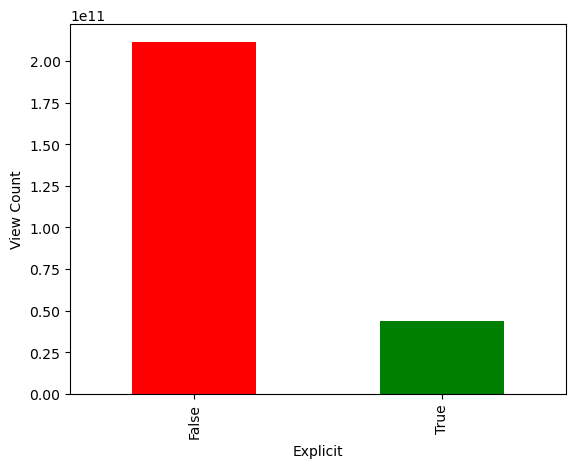

In [ ]:
#Actual Count
df_q1act = df_songs.groupby(['Explicit'])['View Count'].sum().reset_index()

#Graphing on a bar chart
q1 = df_q1act.plot.bar(legend = False, x = 'Explicit', y = 'View Count', color = ['red', 'green'])
q1.set_ylabel('View Count')

print("Non-explicit songs have a total of", int(df_q1act['View Count'][0]), "views.")
print("Explicit songs have a total of", int(df_q1act['View Count'][1]), "views.")

Non-explicit songs have a total of about 211 billion views, compared to explicit songs total view count of about 44 billion.

Now, observe the average view counts of both explicit and non-explicit songs.

In [ ]:
#Average (mean)
df_songs.groupby('Explicit')['View Count'].mean().sort_values(ascending=False).reset_index()

,Explicit,View Count
0,True,6.233971e+08
1,False,2.386849e+08


In [ ]:
#Average (median)
df_songs.groupby('Explicit')['View Count'].median().sort_values(ascending=False).reset_index()

,Explicit,View Count
0,True,434000000.0
1,False,28500000.0


Below are the standard deviations and histogram of explicit and non-explicit songs, based on view count.

In [ ]:
#Standard Deviation
df_songs.groupby('Explicit')['View Count'].std().sort_values(ascending=False).reset_index()

,Explicit,View Count
0,True,6.503387e+08
1,False,5.465520e+08


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

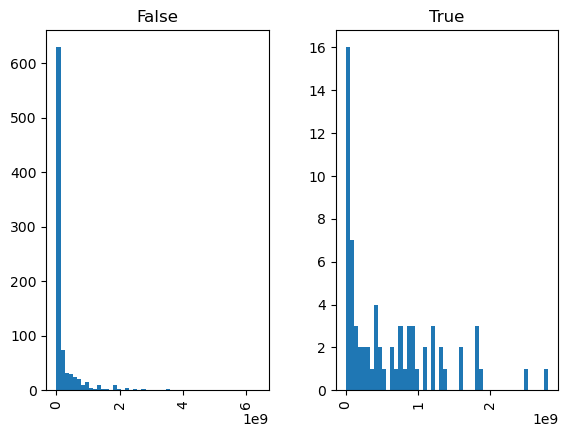

In [ ]:
#Histogram of explicit vs. non-explicit
df_songs.hist(column = 'View Count', by = 'Explicit', bins = 50)

From both the mean and median, it seems that explicit songs have higher average view counts than non-explicit songs, even despite an over-abundance of non-explicit songs in the data. Observing the standard deviation of explicit and non-explicit song view counts reveals that explicit song view counts are more volatile than non-explicit song view counts. The histogram confirms this, as there are more extreme view counts for explicit songs compared to non-explicit songs.

To further see if a song being explicit or not affects viewership, an independent t-test will be done.

In [ ]:
#t-test
exp, non_exp = df_songs[df_songs['Explicit'] == True], df_songs[df_songs['Explicit'] == False]
result = ttest_ind(exp['View Count'], non_exp['View Count'])
print('The t-test statistic is', result[0], ', with a p-value of', result[1], '.')

#Hypothesis testing
if result[1] < 0.05:
    print("Conclusion: reject the null hypothesis. Thus, there is sufficient evidence that there is a significant relationship between song explicity and popularity.")
else:
    print("Conclusion: do not reject the null hypothesis. Thus, there is sufficient evidence that there is no significant relationship between song explicity and popularity.")

The t-test statistic is 5.586072590895898 , with a p-value of 3.029244358682892e-08 .
Conclusion: reject the null hypothesis. Thus, there is sufficient evidence that there is a significant relationship between song explicity and popularity.


From the test, there is a significant relationship between song explicity and popularity.

Thus, together with studying the average view counts, standard deviation and histogram, explicit songs are found to be more popular than non-explicit songs. This suggests that songs with swear words and/or mature content tend to be more popular than songs without; although, this interpretation can be faulty due to the skewness towards explicit songs in the data, since there are more extreme higher view counts with explicit songs.

## Q2: Are longer songs more popular than shorter songs?

To start, we need to establish a grouping variable that will determine if the song is considered as a long song or not. This new variable will be called 'Long', with boolean values True or False.

A song is considered long if its duration exceeds the median song length within the data.

In [ ]:
#Finding the median song length
long = int(df_songs['Song Length'].median())
print(long)

234


The median is 234 seconds, or just under 4 minutes (3 minutes and 54 seconds).

In [ ]:
#Establish grouping variable
df_songs['Long'] = np.where(df_songs['Song Length'] > long, True, False) #songs are considered as long if they exceed 4mins, or 240 sec
df_songs

,Title,Album,Year of Release,Artist,Song Length,Explicit,View Count,Long
0,(And) Then He Kissed Me,Ain't Gonna Cry,1989,Juice Newton,200,False,202000.0,False
1,(God Must Have Spent) A Little More Time On You,'N Sync,1997,*NSYNC,283,False,54000000.0,True
2,(Our Love) Don't Throw It All Away,Shadow Dancing,1978,Andy Gibb,251,False,9000000.0,True
3,15 Minutes,Short n' Sweet (Deluxe),2025,Sabrina Carpenter,192,True,8400000.0,False
4,18,FOUR (Deluxe),2014,One Direction,249,False,226000000.0,True
...,...,...,...,...,...,...,...,...
951,青春コンプレックス - seisyun complex,seisyun complex,2022,kessoku band,206,False,47000000.0,False
952,風のゆくえ - Where the Wind Blows,UTA'S SONGS ONE PIECE FILM RED,2022,Ado,273,False,65000000.0,True
953,風の絆 - Bonding Winds,Monster Hunter Orchestra Concert Nighttime 2024,2024,Hirofumi Kurita,248,False,9200.0,True
954,騒乱 - Unrest,FINAL FANTASY XII Original Soundtrack,2012,SQUARE ENIX MUSIC,177,False,35000.0,False


With long songs established in the data, we obtain the counts of each.

In [ ]:
#Getting the count of short and long songs, by title of song
df_songs.groupby(['Long'])['Title'].count()

Long
False    484
True     472
Name: Title, dtype: int64

There are 484 songs that are considered not long, while there are 472 songs that are considered long. Note that both counts sum up to the total amount of songs in the dataset.

In [ ]:
#Showing that the counts are all songs in the dataset
df_songs.groupby(['Long'])['Title'].count().sum()

956

Shorter songs have a total of 119375506616 views.
Longer songs have a total of 135737128355 views.


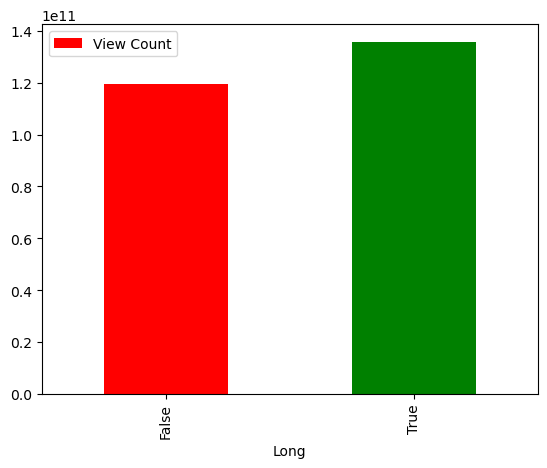

In [ ]:
#Actual
df_q2act = df_songs.groupby(['Long'])['View Count'].sum().reset_index()

q2 = df_q2act.plot.bar(x = 'Long', y = 'View Count', color = ['red', 'green'])
q2

print("Shorter songs have a total of", int(df_q2act['View Count'][0]), "views.")
print("Longer songs have a total of", int(df_q2act['View Count'][1]), "views.")

Looking at the actual counts, long songs total to about 136 billion views, while not long songs total to about 119 billion views.

Now, to view the average view counts of long and not long songs.

In [ ]:
#Average (mean)
df_songs.groupby('Long')['View Count'].mean().sort_values(ascending=False).reset_index()

,Long,View Count
0,True,2.875787e+08
1,False,2.466436e+08


In [ ]:
#Average (median)
df_songs.groupby('Long')['View Count'].median().sort_values(ascending=False).reset_index()

,Long,View Count
0,True,50000000.0
1,False,26500000.0


Below are the standard deviations and histogram of long and not-long songs, based on view count.

In [ ]:
#Standard deviation
df_songs.groupby('Long')['View Count'].std().sort_values(ascending=False).reset_index()

,Long,View Count
0,True,5.846326e+08
1,False,5.417649e+08


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

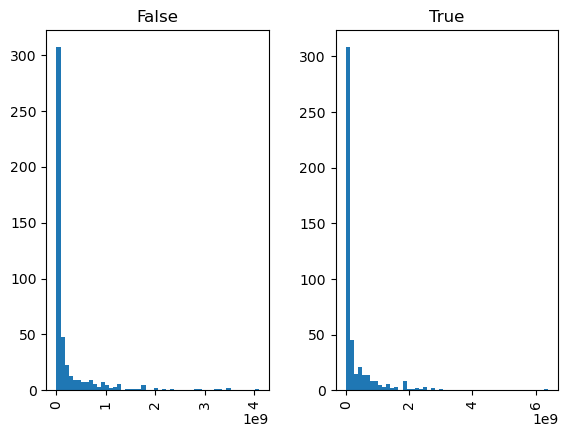

In [ ]:
#Histogram of long vs not-long songs
df_songs.hist(column = 'View Count', by = 'Long', bins = 50)

From both the mean and median, long songs have higher average view counts than not-long songs. Looking at the standard deviations, both long and not-long songs seem to have equal deviation, with the histogram confirming this as both share similar graphs. Though, long song view counts are slightly more volatile than not-long song view counts.

To observe if there is a significant correlation between song duration and popularity, see below for Pearson's r test.

In [ ]:
#Correlation (Pearson's r)
x, y = df_songs['Song Length'], df_songs['View Count']
result = scipy.stats.pearsonr(x,y)
print('The correlation coefficient is', result[0], ', with a p-value of', result[1], '.')

#Hypothesis testing
if result[1] < 0.05:
    print("Conclusion: reject the null hypothesis. Thus, there is sufficient evidence that there is a correlation between song duration and popularity.")
else:
    print("Conclusion: do not reject the null hypothesis. Thus, there is sufficient evidence that there is not a correlation between song duration and popularity.")

The correlation coefficient is 0.00156488913600346 , with a p-value of 0.9614596819553555 .
Conclusion: do not reject the null hypothesis. Thus, there is sufficient evidence that there is not a correlation between song duration and popularity.


Though the correlation coefficient shows that there is a very weak negative relationship between song duration and popularity, the test shows that there is no correlation between the two.

This suggests that the length of a song does not matter in popularity, but rather how pleasing the song is to listen to; quality over quantity!

## Q3: Are video game songs more popular than non-video game songs?

As mentioned before in DATA, the artist list has been segregated based on VGM and non-VGM, with some exceptions. To be fair with the upcoming analyses, we sampled random non-VGM artists to compare with VGM.

In [ ]:
#Initialise a copy of the non-VGM artist list to keep track of artists to pick from after each test
available_nonvgm = artist_list.copy()

#Initialise a list of artists that are related to VGM
detect = ['Azumi Takahashi', 'Jason Stephenson', 'Lotus Juice', 'Lyn', 'ATLUS GAME MUSIC', 'Crush 40', 'Kellin Quinn', 'MONACA', 'Hirofumi Kurita']

An additional list of artists was created, since some of the VGM was not being detected as VGM. This is due to how some of the video game songs having an different artist listed as their first one, which was not in the curated VGM artist list.

Below are ten boxplot tests comparing VGM view counts with random sampled non-VGM view counts, to observe if VGM is more popular than non-VGM.

C:\Users\joshu\AppData\Local\Temp\ipykernel_18832\1009734749.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['Is VGM'] = np.where(df_q3['Artist'].isin(vgm_list + detect), True, False)


Non-VGM Artists Chosen: ['Christopher Cross', 'Bee Gees', 'Juice Newton', 'Adele']
Is VGM
False    2.905181e+08
True     5.748340e+06
Name: View Count, dtype: float64


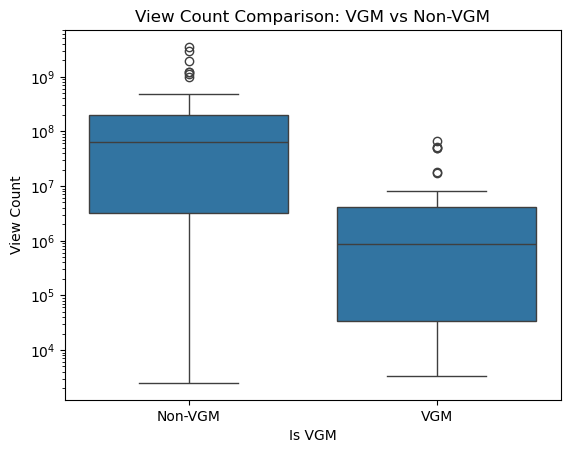

C:\Users\joshu\AppData\Local\Temp\ipykernel_18832\1009734749.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['Is VGM'] = np.where(df_q3['Artist'].isin(vgm_list + detect), True, False)


Non-VGM Artists Chosen: ['Coldplay', 'Bruno Mars', 'Rihanna', 'Evanescence']
Is VGM
False    848512500.0
True       5748340.0
Name: View Count, dtype: float64


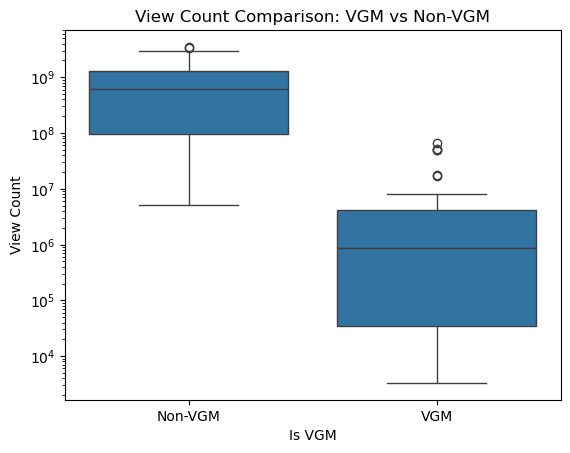

C:\Users\joshu\AppData\Local\Temp\ipykernel_18832\1009734749.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['Is VGM'] = np.where(df_q3['Artist'].isin(vgm_list + detect), True, False)


Non-VGM Artists Chosen: ['NSYNC', 'Eve', 'Carpenters', 'Taylor Swift']
Is VGM
False    2.712205e+08
True     5.748340e+06
Name: View Count, dtype: float64


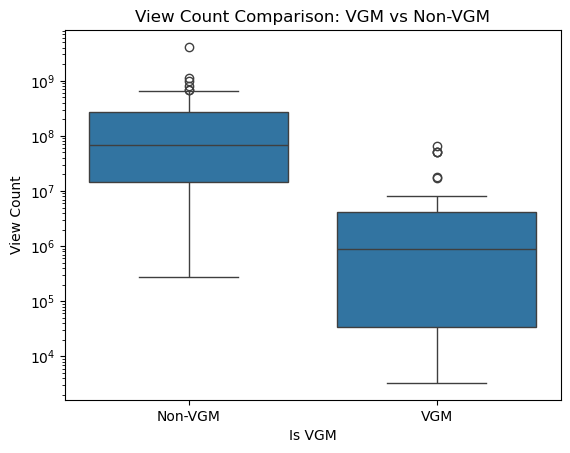

C:\Users\joshu\AppData\Local\Temp\ipykernel_18832\1009734749.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['Is VGM'] = np.where(df_q3['Artist'].isin(vgm_list + detect), True, False)


Non-VGM Artists Chosen: ['Kendrick Lamar', 'Norah Jones', 'Smash Mouth', 'James Taylor']
Is VGM
False    1.570600e+08
True     5.748340e+06
Name: View Count, dtype: float64


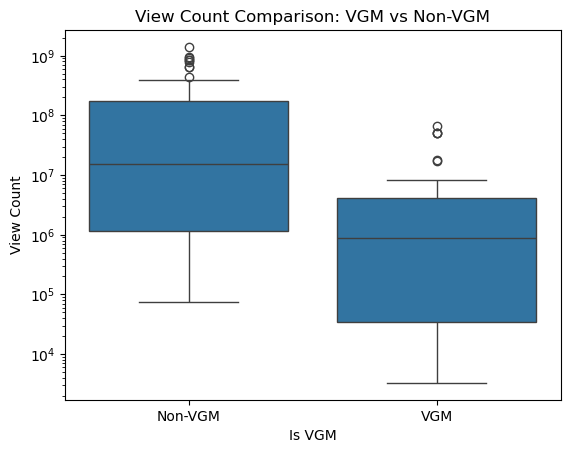

C:\Users\joshu\AppData\Local\Temp\ipykernel_18832\1009734749.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['Is VGM'] = np.where(df_q3['Artist'].isin(vgm_list + detect), True, False)


Non-VGM Artists Chosen: ['Hatsune Miku', 'Sade', 'Cyndi Lauper', 'Earth Wind and Fire']
Is VGM
False    201253687.5
True       5748340.0
Name: View Count, dtype: float64


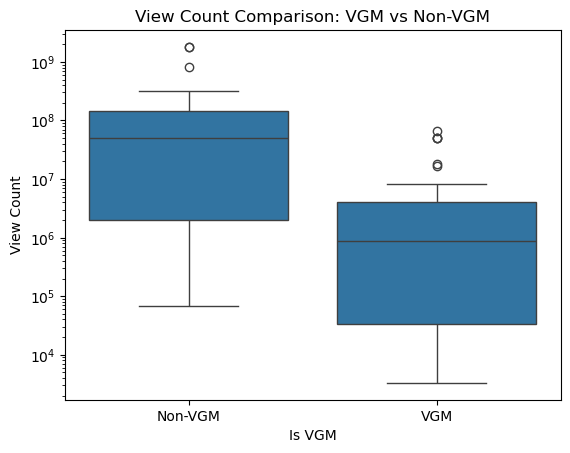

C:\Users\joshu\AppData\Local\Temp\ipykernel_18832\1009734749.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['Is VGM'] = np.where(df_q3['Artist'].isin(vgm_list + detect), True, False)


Non-VGM Artists Chosen: ['Beyonce', 'Michael Jackson', 'Rick Astley', 'Renee Olstead']
Is VGM
False    3.228253e+08
True     5.748340e+06
Name: View Count, dtype: float64


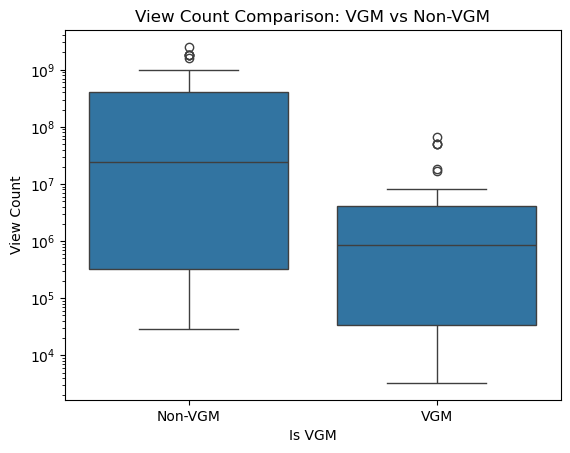

C:\Users\joshu\AppData\Local\Temp\ipykernel_18832\1009734749.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['Is VGM'] = np.where(df_q3['Artist'].isin(vgm_list + detect), True, False)


Non-VGM Artists Chosen: ['One Direction', 'DECO*27', 'Backstreet Boys', 'Stevie Wonder']
Is VGM
False    2.850931e+08
True     5.748340e+06
Name: View Count, dtype: float64


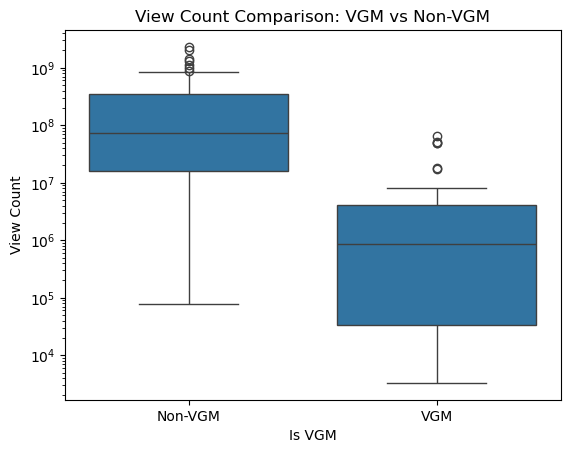

C:\Users\joshu\AppData\Local\Temp\ipykernel_18832\1009734749.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['Is VGM'] = np.where(df_q3['Artist'].isin(vgm_list + detect), True, False)


Non-VGM Artists Chosen: ['Linkin Park', 'Mariah Carey', 'ABBA', 'Eminem']
Is VGM
False    6.298597e+08
True     5.748340e+06
Name: View Count, dtype: float64


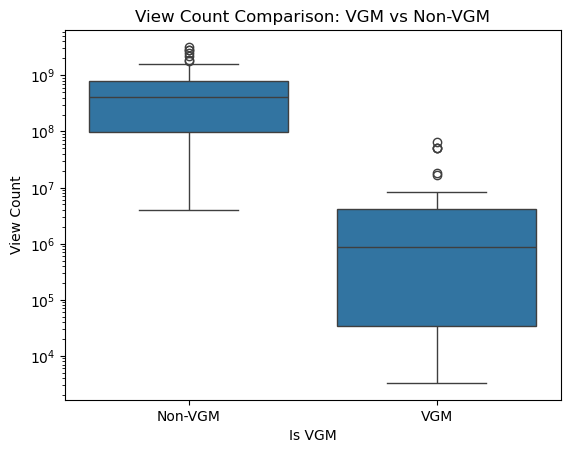

C:\Users\joshu\AppData\Local\Temp\ipykernel_18832\1009734749.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['Is VGM'] = np.where(df_q3['Artist'].isin(vgm_list + detect), True, False)


Non-VGM Artists Chosen: ['Pink Floyd', 'Frank Sinatra', 'Billy Joel', 'Laufey']
Is VGM
False    8.041828e+07
True     5.748340e+06
Name: View Count, dtype: float64


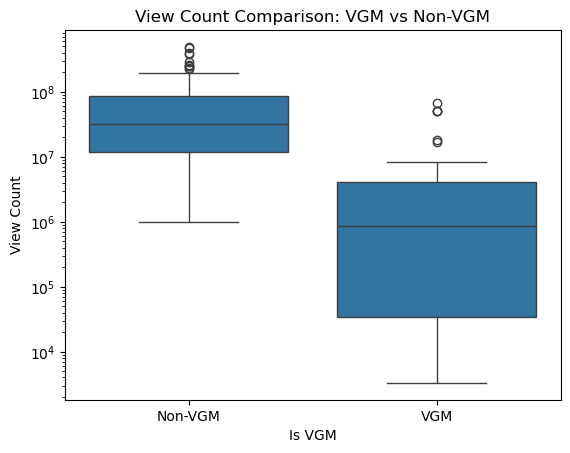

C:\Users\joshu\AppData\Local\Temp\ipykernel_18832\1009734749.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['Is VGM'] = np.where(df_q3['Artist'].isin(vgm_list + detect), True, False)


Non-VGM Artists Chosen: ['Jungle', 'Sex Pistols', 'Elton John', 'Patti Austin']
Is VGM
False    8.522528e+07
True     5.748340e+06
Name: View Count, dtype: float64


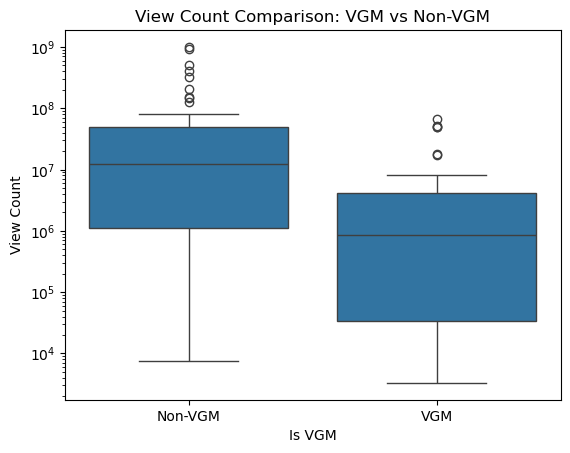

In [ ]:
#For-loop to create 10 tests
for i in range(10):
    #Checker if the sample is the right amount
    if len(available_nonvgm) < 4:
        break
    #Samples four random non-VGM artists
    non_vgm_artists = random.sample(available_nonvgm, 4)

    # Remove chosen artists so they aren't selected again
    for artist in non_vgm_artists:
        available_nonvgm.remove(artist)

    #List that contains all artists for the subset of the main data
    consid_artists = non_vgm_artists + vgm_list + detect

    #Take subset of main data, depending on chosen VGM and non-VGM artists
    df_q3 = df_songs[df_songs['Artist'].isin(consid_artists)]
    df_q3['Is VGM'] = np.where(df_q3['Artist'].isin(vgm_list + detect), True, False)

    print("Non-VGM Artists Chosen:", non_vgm_artists)
    print(df_q3.groupby('Is VGM')['View Count'].mean())

    # Visualization
    sns.boxplot(x='Is VGM', y='View Count', data=df_q3)
    plt.title('View Count Comparison: VGM vs Non-VGM')
    plt.ylabel('View Count')
    plt.xticks([0, 1], ['Non-VGM', 'VGM'])
    plt.yscale('log')  # Log scale to better visualize wide range
    plt.show()

From the boxplots constructed above, even with varying values of average non-VGM view counts, there seems to be the common pattern that VGM is less popular than non-VGM. To confirm this pattern, we will be doing a time-series analysis to visualise the total view counts of VGM and non-VGM by year of release.

In [ ]:
#Transforming the subset's Year of Release values to numerical values, as well as dropping any songs without a release year
df_q33 = df_songs
df_q33['Is VGM'] = np.where(df_songs['Artist'].isin(vgm_list + detect), True, False)
df_q33['Year of Release'] = pd.to_numeric(df_q33['Year of Release'], errors='coerce')
df_q33 = df_q33[df_q33['Year of Release'] > 2005]  # Filter for years > 2005
df_q33 = df_q33.dropna(subset=['Year of Release'])
df_q33

,Title,Album,Year of Release,Artist,Song Length,Explicit,View Count,Long,Is VGM
3,15 Minutes,Short n' Sweet (Deluxe),2025,Sabrina Carpenter,192,True,8.400000e+06,False,False
4,18,FOUR (Deluxe),2014,One Direction,249,False,2.260000e+08,True,False
5,22,Red,2012,Taylor Swift,233,False,7.940000e+08,False,False
6,24K Magic,24K Magic,2016,Bruno Mars,226,False,2.000000e+09,False,False
7,7elmet ado 6,7elmet ado 6,2022,ElGrandeToto,463,True,1.400000e+07,True,False
...,...,...,...,...,...,...,...,...,...
951,青春コンプレックス - seisyun complex,seisyun complex,2022,kessoku band,206,False,4.700000e+07,False,False
952,風のゆくえ - Where the Wind Blows,UTA'S SONGS ONE PIECE FILM RED,2022,Ado,273,False,6.500000e+07,True,False
953,風の絆 - Bonding Winds,Monster Hunter Orchestra Concert Nighttime 2024,2024,Hirofumi Kurita,248,False,9.200000e+03,True,True
954,騒乱 - Unrest,FINAL FANTASY XII Original Soundtrack,2012,SQUARE ENIX MUSIC,177,False,3.500000e+04,False,True


Note that the subset has 502 songs to be considered. With the subset now fit for time-series analysis, we constructed the analysis.

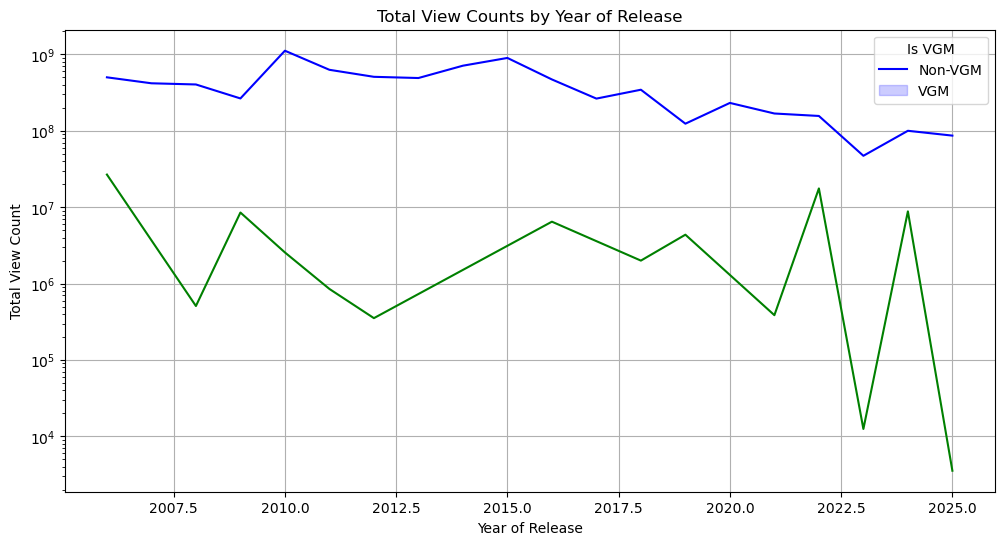

In [ ]:
#Initialise the time-series data to plot
year_views = df_q33.groupby(['Year of Release', 'Is VGM'])['View Count'].mean().reset_index()

#Lineplot of time-series data
plt.figure(figsize=(12,6))
sns.lineplot(data=year_views, x='Year of Release', y='View Count', hue='Is VGM', palette={True: 'green', False: 'blue'})
plt.title('Total View Counts by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Total View Count')
plt.legend(title='Is VGM', labels=['Non-VGM', 'VGM'])
plt.yscale('log')
plt.grid(True)
plt.show()

As seen on the time-series graph, non-VGM music always surpasses view counts of VGM. With the boxplot results, we can hence conclude that non-VGM music is more popular that VGM.

Though, there are drastic drops in VGM view counts. This could be due to those songs likely being VGM song covers/remixes/derivations, which tend to garner lower view counts.

## Q4: Are pre-2000s songs more popular than post-2000s songs?

In [ ]:
#Creating a copy of the main dataset, for this question's specific use
df_q4 = df_songs

Like the previous question, we must convert the years into numeric values.

In [ ]:
#Turning the string objects of Year of Release into integers
df_q4['Year of Release'] = (df_q4['Year of Release']).astype(int)
df_q4['Year of Release'].dtypes

dtype('int32')

With the years in the right format, next is to establish the grouping variable that determines if a song is pre-2000s or post-2000s.

In [ ]:
#Establish grouping variable
df_q4['Pre-2000s'] = np.where(df_q4['Year of Release'] < 2000, True, False)
df_q4

,Title,Album,Year of Release,Artist,Song Length,Explicit,View Count,Long,Is VGM,Pre-2000s
0,(And) Then He Kissed Me,Ain't Gonna Cry,1989,Juice Newton,200,False,202000.0,False,False,True
1,(God Must Have Spent) A Little More Time On You,'N Sync,1997,*NSYNC,283,False,54000000.0,True,False,True
2,(Our Love) Don't Throw It All Away,Shadow Dancing,1978,Andy Gibb,251,False,9000000.0,True,False,True
3,15 Minutes,Short n' Sweet (Deluxe),2025,Sabrina Carpenter,192,True,8400000.0,False,False,False
4,18,FOUR (Deluxe),2014,One Direction,249,False,226000000.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...
951,青春コンプレックス - seisyun complex,seisyun complex,2022,kessoku band,206,False,47000000.0,False,False,False
952,風のゆくえ - Where the Wind Blows,UTA'S SONGS ONE PIECE FILM RED,2022,Ado,273,False,65000000.0,True,False,False
953,風の絆 - Bonding Winds,Monster Hunter Orchestra Concert Nighttime 2024,2024,Hirofumi Kurita,248,False,9200.0,True,True,False
954,騒乱 - Unrest,FINAL FANTASY XII Original Soundtrack,2012,SQUARE ENIX MUSIC,177,False,35000.0,False,True,False


In [ ]:
#Viewing actual counts of songs in each era
df_q4['Pre-2000s'].value_counts()

Pre-2000s
False    620
True     336
Name: count, dtype: int64

There are 620 post-2000s songs, and 336 pre-2000s songs. Note that both counts sum up to the total songs in the dataset.

In [ ]:
#Checking if both counts sum up to all songs in the dataset
df_q4.groupby(['Pre-2000s'])['Title'].count().sum()

956

To visualise the ditribution of songs in each era, we made a pie-chart to show the proportions of songs.

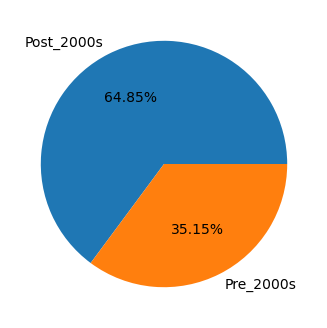

In [ ]:
#Transforming the counts into percentages
df_pc = pd.DataFrame(df_q4['Pre-2000s'].value_counts()/(df_q4['Title'].count().sum())*100)

#Pie-chart
plt.figure(figsize=(8,4))
plt.pie(x = 'count',data = df_pc, autopct='%1.2f%%', labels=['Post_2000s','Pre_2000s'])
plt.show()

We can clearly see that there are more post-2000s songs than pre-2000s songs.

Moving onto the actual view counts of songs from both eras:

Post_2000s songs have a total of 197533891171 views.
Pre_2000s songs have a total of 57578743800 views.


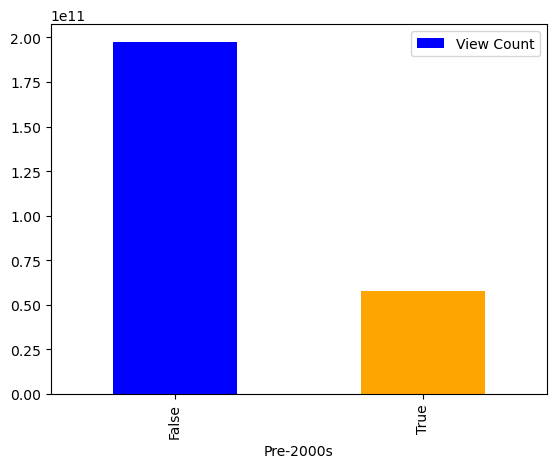

In [ ]:
#Actual counts
df_q44 = df_songs.groupby(['Pre-2000s'])['View Count'].sum().reset_index()

#Bar chart
q4 = df_q44.plot.bar(x = 'Pre-2000s', y = 'View Count', color = ['Blue', 'Orange'])
q4

print("Post_2000s songs have a total of", int(df_q44['View Count'][0]), "views.")
print("Pre_2000s songs have a total of", int(df_q44['View Count'][1]), "views.")

So, post-2000s songs have a total view count of about 198 billion, while pre-2000s songs have a total view count of about 58 billion. This is due to the uneven number of post and pre-2000s songs.

Next, we go into the averages, standard deviation and histogram.

In [ ]:
#Average (mean)
df_songs.groupby(['Pre-2000s'])['View Count'].mean().sort_values(ascending=False).reset_index()

,Pre-2000s,View Count
0,False,3.186031e+08
1,True,1.713653e+08


In [ ]:
#Average (median)
df_songs.groupby(['Pre-2000s'])['View Count'].median().sort_values(ascending=False).reset_index()

,Pre-2000s,View Count
0,False,38000000.0
1,True,36000000.0


In [ ]:
#Standard deviation
df_songs.groupby(['Pre-2000s'])['View Count'].std().sort_values(ascending=False).reset_index()

,Pre-2000s,View Count
0,False,6.401874e+08
1,True,3.654319e+08


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

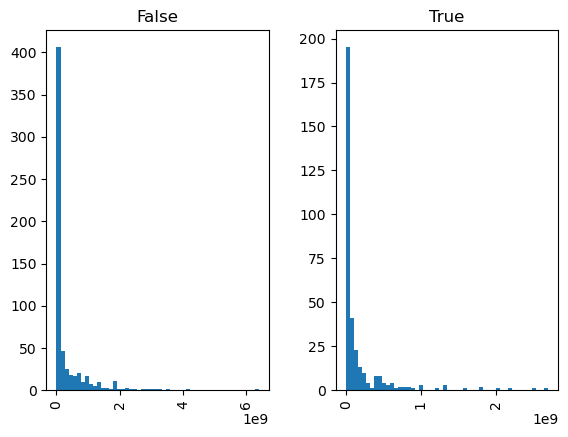

In [ ]:
#Histogram of pre-2000s vs post-2000s songs
df_q4.hist(column = 'View Count', by = 'Pre-2000s', bins = 50)

By viewing the median and mean, post-2000s songs has higher average view counts than pre-2000s songs. The standard deviations show that post-2000s songs view counts are more volatile than pre-2000s songs view counts. When looking at the histogram, there are more extreme view counts for pre-2000s songs.

To further study if there is a significant relationship between the era of song and its popularity, an independent t-test will be conducted.

In [ ]:
pre2k = df_q4[df_q4['Pre-2000s']== True]['View Count']
post2k = df_q4[df_q4['Pre-2000s']== False]['View Count']

t_stat, p_val = ttest_ind(pre2k, post2k, equal_var=False)

print('t-statistic: ',t_stat)
print('p-value: ',p_val)

if p_val < 0.05:
    print("Reject the null hypothesis.")
    print("There is sufficient evidence that there is a significant relationship between era and popularity.")
else:
    print("Fail to reject the null hypothesis")
    print("There is insufficient evidence that there is no significant relationship between era and popularity.")

t-statistic:  -4.52563012728979
p-value:  6.783325112869156e-06
Reject the null hypothesis.
There is sufficient evidence that there is a significant relationship between era and popularity.


From the test, there is a significant relationship between era and popularity.

Thus, together with studying the average view counts, standard deviation and histogram, it seems that post-2000s songs are more popular than pre-2000s, on average. This is due to the popularity of post-2000s songs being generally consistent, compared to the extreme values found in pre-2000s popularity. Though, with how close the median view counts are for both eras of songs, it can be assumed that pre-2000s songs can still reach popularity; this is most likely because the pre-2000s songs chosen are solid songs, while the post-2000s songs do consist of pop songs of recent years, which beats the popularity of pre-2000s songs.

## Additional Question: From the data, what are the top 5 songs? Top 5 artists?

> Add blockquote



In [ ]:
df_songs.sort_values(by = 'View Count', ascending = False).head(5)

,Title,Album,Year of Release,Artist,Song Length,Explicit,View Count,Long,Is VGM,Pre-2000s
787,Uptown Funk (feat. Bruno Mars),Uptown Special,2015,Mark Ronson,270,False,6.400000e+09,True,False,False
94,Blank Space,1989 (Deluxe),2014,Taylor Swift,232,False,4.100000e+09,False,False,False
176,Diamonds,Unapologetic,2012,Rihanna,226,False,3.500000e+09,False,False,False
585,Rolling in the Deep,Rolling in the Deep,2010,Adele,229,False,3.500000e+09,False,False,False
723,The Lazy Song,Doo-Wops & Hooligans,2010,Bruno Mars,190,False,3.300000e+09,False,False,False


In [ ]:
df_songs.groupby(['Artist'])['View Count'].sum().sort_values(ascending = False).reset_index().head(5)

,Artist,View Count
0,Bruno Mars,2.104400e+10
1,Eminem,2.065200e+10
2,Rihanna,2.000000e+10
3,Coldplay,1.360300e+10
4,Linkin Park,1.282700e+10


## Additional Question: From the data, what are the bottom 5 songs? Bottom 5 artists?

In [ ]:
df_songs.sort_values(by = 'View Count', ascending = False).tail(5)

,Title,Album,Year of Release,Artist,Song Length,Explicit,View Count,Long,Is VGM,Pre-2000s
627,"Sigh of Relief (from ""Resident Evil"")",Resident Evil Piano Collection,2024,Sebastien Skaf,108,False,79.0,False,False,False
715,"The Decisive Battle! The Cybeast! (from ""Mega ...",BOSS,2025,Tyler Gonelli,147,False,58.0,False,False,False
872,it's Sakura,it's Sakura,2025,kessoku band,217,False,50.0,False,False,False
156,"Credits (from ""Resident Evil 0"")",Resident Evil Piano Collection,2024,Sebastien Skaf,339,False,39.0,True,False,False
395,LaL Goo,LaL Goo,2025,Lil Tree Treezy,70,False,33.0,False,False,False


In [ ]:
df_songs.groupby(['Artist'])['View Count'].sum().sort_values(ascending = False).reset_index().tail(5)

,Artist,View Count
139,Helena Voss,212.0
140,As You Sleep,157.0
141,Pure Piano,127.0
142,Tyler Gonelli,58.0
143,Lil Tree Treezy,33.0


Note that these artists and songs are most likely YouTube creators who have made covers/remixes of VGM, hence some VGM having low view counts (shown earlier). Though, upon further inspection, the last song 'LaL Goo' is not a VGM artist nor an artist considered in our data; rather, this person used 'Crush 40'as part of their artist list (even if the song itself does not feature them), hence it being considered in the dataset.

# CONCLUSION

## Shortcomings from the API

- Lack of crucial song details, and the ones that we're able to access require an indirect method.

Song searches in the API do not provide vital song details, like genre or tags to determine if they are VGM or not, making it quite difficult to search for desired songs. Even with the details we were able to get, they had to be done through indirect methods. For example, to get the year of release of each song, it had to be obtained by taking the album of the song and getting its release year; the song's themselves do not have a year or date of release, meaning that songs without an album do not have a year in the dataset. This is why in Q4, almost half of the dataset got removed.

- Unable to filter out non-official songs of original music

Because there are no tags for a song if it comes from the offical artist or not, it can be difficult to tell which song is official or not; apart from knowing the song or artist personally, there really is no solid way of checking! This is especially felt in Q3, with the large dips in view counts in recent years most liekly due to those being covers of songs, and in the last additional question, where a person managed to attach a considered artist in the data into the artist list of their song and hence it being considered as VGM, even if it clearly isn't.

- No numerical view counts and years

This can be considered minor compared to the other shortcomings, but regardless still holds true. We had to convert both into their numerical representations so that they would be fit for data analysis.

- Searches sometimes gives different results

This has not been confirmed properly, but since the data from YouTube Music is updated frequently, whether it be an artist posting new songs or artist lists for some songs being changed, it can sometimes 'break' the code for pre-processing the data. It happened with us!

## Shortcomings from us

- Lack of understanding of the API

YTMusicAPI has been recently found by our group, so we did not have much time to become aquainted with its searches and functions. Perhaps by studying its documentation thoroughly, and playing around with the codes a bit further, an improved dataset can be created, leading to better analyses.

- Lack of range in the chosen artists

Since the chosen artists came from our personal tastes, it led to an uneven distribution of music genres and types, which could have had an affect on our analysis findings. Perhaps we could have come up with a way to randomly sample from a huge list of relevant artists across different eras, genres and music types. (VGM, movie OST, etc.)

## Overall Thoughts and Answer to the Main Question

So, is YTMusicAPI fit for data analyses? Yes! For the most part. If you are willing to study it and deal with its quirks, we think you can get relevant and recent music data. It would be better to use an API that is closely related with music, like the Spotify API or the LyricsGenius API, but this is a great alternative if neither work for you.

As for the takeaways from each question...

- Q1: Explicity in song production is something that is taken seriously, as it does have an affect on its popularity. Though, this could be because songs with explicit/mature content are within well-established genres, like rap and some Japanese songs. This could also mean that the general public tend to lean towards explicit songs, though this might be a stretch.

- Q2: Be reassured! Longer songs do not mean they become more popular! Nor does shorter songs mean more popularity. What matters is the quality of the song, and personal preferrence. This is without considering different genres and kinds of music, where longer songs may be more popular; but in a general sense, the length of a song is irrelevant to its popularity, and to some extent its quality.

- Q3: Unfortunately, VGM still has yet to reach the popularity of non-VGM, let alone surpass its popularity. Sure, there are many vocal fans of VGM, but the truth is that pop music and whatever is trending will always beat VGM music in popularity. This does not mean that VGM is not popular, for the view counts of its songs are still pretty high. VGM's lower popularity also could be due to the many genres it covers; saying that you listen to VGM doesn't really give someone a good idea of what kind of music you listen to!

- Q4: While there is a definitive answer of post-2000s songs being more popular, like in Q3 pre-2000s can still surpass its popularity. Sadly, it will most likely be due to the decline of recent music, where more people would go back to older songs that they know are still good to listen to. This also confirms that the songs in pre-2000s are still solid and worth listening to, meaning that the age of a song has little bearing over its popularity. People still listen to the classics for a reason!

Based on the results from each question, a song is more likely to be popular if: it contains explicit/mature content, it is not VGM, and is made in recent years. The song can be as long as it wants!